In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_excel('2021M1.xlsx', skiprows=2)

In [ ]:
df.head()

,Countries,Canada,France,Germany,Italy,Japan,United Kingdom,United States,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Canada,NaN,182.352251,415.434050,181.372819,800.140783,1524.279961,26703.649930,NaN,NaN,NaN,NaN,NaN,NaN
1,France,296.530252,NaN,6505.206225,3609.776382,671.816793,2211.514881,3015.829720,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,765.144447,9554.027691,NaN,6551.519107,1806.710463,5399.090567,10320.618698,NaN,NaN,NaN,NaN,NaN,NaN
3,Italy,331.691541,4508.622429,5843.193707,NaN,687.903277,1543.974648,3610.256832,NaN,NaN,NaN,NaN,NaN,NaN
4,Japan,676.496486,497.472551,1527.882819,377.796492,NaN,795.671765,9699.242166,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fixed21 = pd.melt(df, id_vars=['Countries'], var_name='counterparts', value_name='Balance')

In [ ]:
fixed21

,Countries,counterparts,Balance
0,Canada,Canada,NaN
1,France,Canada,296.530252
2,Germany,Canada,765.144447
3,Italy,Canada,331.691541
4,Japan,Canada,676.496486
...,...,...,...
112,Japan,Unnamed: 13,NaN
113,United Kingdom,Unnamed: 13,NaN
114,United States,Unnamed: 13,NaN
115,NaN,Unnamed: 13,NaN


In [ ]:
fixed21 = fixed21.dropna()
fixed21['Countries'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States', 'Canada'], dtype=object)

In [ ]:
fixed21['Balance'] = fixed21['Balance'].astype(float)
print(fixed21)
print(fixed21['Balance'].dtype)

         Countries    counterparts       Balance
1           France          Canada    296.530252
2          Germany          Canada    765.144447
3            Italy          Canada    331.691541
4            Japan          Canada    676.496486
5   United Kingdom          Canada    712.170095
6    United States          Canada  21217.187629
9           Canada          France    182.352251
11         Germany          France   9554.027691
12           Italy          France   4508.622429
13           Japan          France    497.472551
14  United Kingdom          France   1131.013426
15   United States          France   1996.406425
18          Canada         Germany    415.434050
19          France         Germany   6505.206225
21           Italy         Germany   5843.193707
22           Japan         Germany   1527.882819
23  United Kingdom         Germany   2270.212716
24   United States         Germany   4516.721760
27          Canada           Italy    181.372819
28          France  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fixed21['Bal_rank'] = fixed21.groupby('Countries')['Balance'].rank()
fixed21 = fixed21.sort_values(by='Countries')
fixed21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Countries,counterparts,Balance,Bal_rank
54,Canada,United States,26703.649930,6.0
9,Canada,France,182.352251,2.0
45,Canada,United Kingdom,1524.279961,5.0
36,Canada,Japan,800.140783,4.0
18,Canada,Germany,415.434050,3.0
27,Canada,Italy,181.372819,1.0
1,France,Canada,296.530252,1.0
55,France,United States,3015.829720,4.0
46,France,United Kingdom,2211.514881,3.0
37,France,Japan,671.816793,2.0


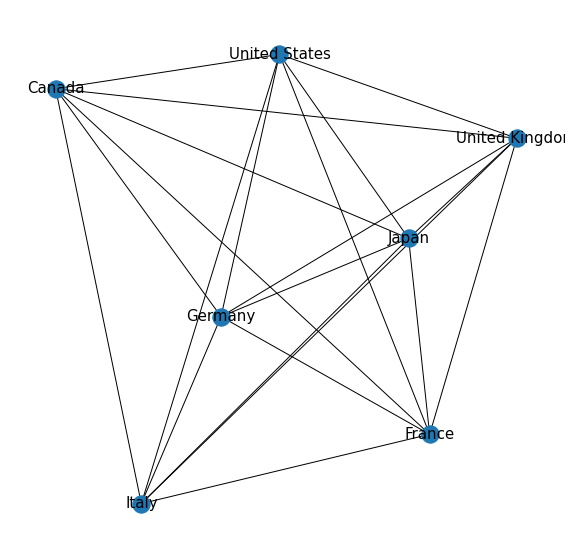

In [ ]:
#spring graph

G = nx.Graph()

for index, row in fixed21.iterrows():  # iterate over rows as (index, Series) pairs
    G.add_edge(row[0], row[1], weight=row[3])

# remove isolated vertices (if any)
remove = [node for node, degree in G.degree() if degree==0]  # degree is number of edges to/from the node
G.remove_nodes_from(remove)

# Producing the network
plt.subplots(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=15)
nx.draw_networkx_labels(G,pos=pos,font_size=15)
plt.axis('off');
#plt.show()

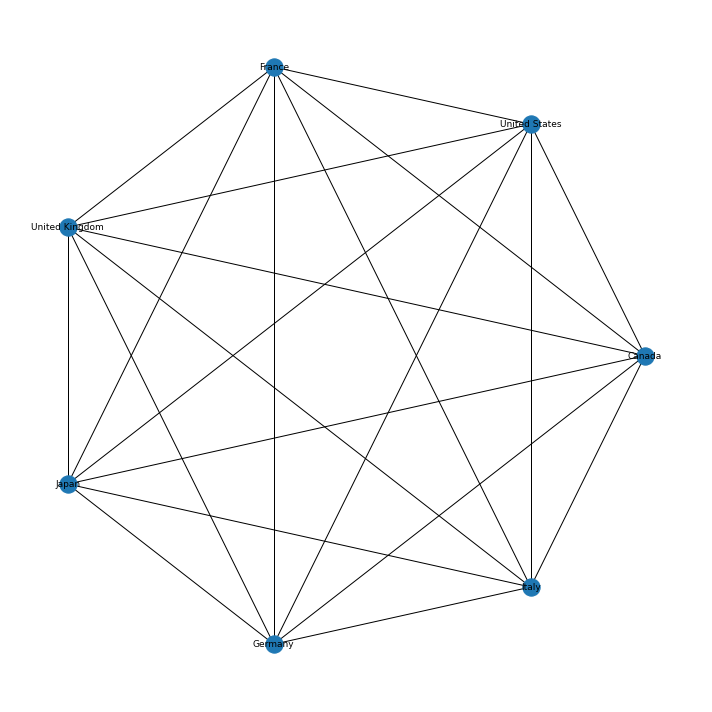

In [ ]:
#cycle graph

G = nx.Graph()

for index, row in fixed21.iterrows():  # iterate over rows as (index, Series) pairs
    G.add_edge(row[0], row[1], weight=row[3])

# remove isolated vertices (if any)
remove = [node for node, degree in G.degree() if degree==0]  # degree is number of edges to/from the node
G.remove_nodes_from(remove)

# Producing the network
plt.subplots(figsize=(10, 10))
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, font_size=9)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.show()

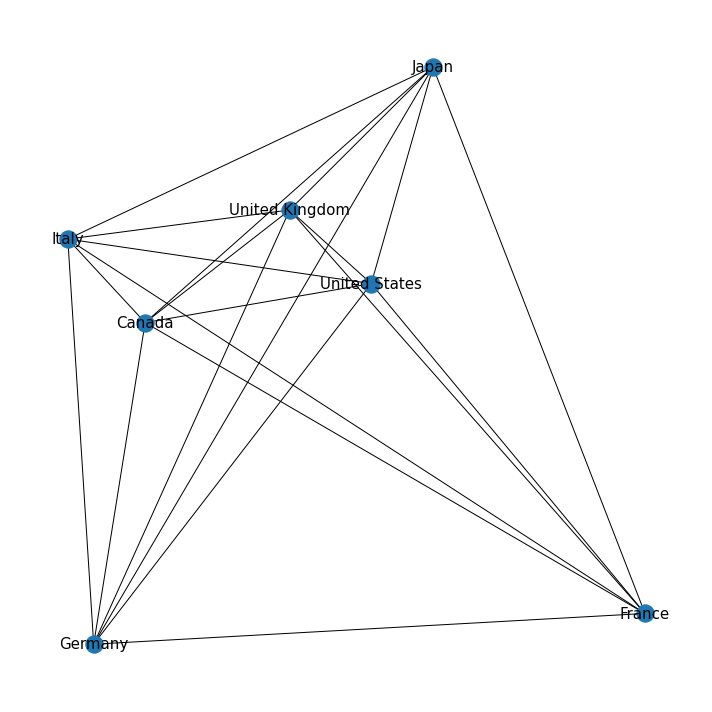

In [ ]:
#random layout
plt.subplots(figsize=(10,10))
pos=nx.random_layout(G)
nx.draw(G,pos=pos,font_size=15)
nx.draw_networkx_labels(G,pos=pos,font_size=15)
plt.tight_layout()
plt.axis('off');
plt.show()